# Neural Network

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

### Importing data

In [3]:
data = pd.read_csv('./Data/train.csv')
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Converting the input into a numpy array

In [5]:
data = np.array(data)
m, n = data.shape
print(f'shape of data :\n rows: {m} and columns: {n}')

# randomly shuffling data before splitting into testing and training sets
np.random.shuffle(data)

shape of data :
 rows: 42000 and columns: 785


> There are 42000 rows and 785 columns; that means we have 42000 examples row wise (each row is an image of total 784 pixel (28*28))

### Preparing testing data

- Test data contains first 1000 rows
- `data_test` variable before transposing would contain 1000 example row wise; after transposing, it would contain 1000 examples column wise. 
- `y_test` variable contains the labels (The thing we want to predict (1000 numbers between 0 and 9)
- `x_test` variable contains the features (The things we use to predict labels (1000 - 784 long numpy arrays with pixel value[0-255]))
- We need to normalize the `x_test` variable's pixel values which are usually in the range of 0 to 255, to a range of 0 to 1 to prevent certain features from dominating the model due to their scale.

In [6]:
data_test = data[0:1000].T 
print(f'Shape of data_test (After transposing): {data_test.shape}\n')

y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test / 255.

print(y_test.shape)

Shape of data_test (After transposing): (785, 1000)

(1000,)


### Preparing training data

In [7]:
data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.

In [8]:
_, m_train = x_train.shape

print(m_train)

41000


In [9]:
y_train

array([7, 1, 0, ..., 0, 0, 6], dtype=int64)

### Function to initialize weights and biases

In [10]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    return W1, W2, B1, B2

### ReLu Activation function

- ReLu is a non-linear activation function which is used to introduce non-linearity in the model. It would return 0 if the input is negative and the input itself if the input is positive.

In [11]:
def ReLU(arr):
    return np.maximum(arr, 0)

### ReLU derivative

- This is the derivative of the ReLu function. It would return 0 if the input is negative and 1 if the input is positive.

In [12]:
def derv_ReLU(arr):
    return arr > 0

### SoftMax Activation function

- SoftMax is a non-linear activation function which is used to squash the output of the model to a range of 0 to 1 (a probability distribution). It is used in the output layer of the model. It is also used to calculate the loss function.

In [13]:
def softMax(arr):
    sm = np.exp(arr) / sum(np.exp(arr))
    return sm

### One hot encoding

- One hot encoding is a process of converting categorical data into a form that could be provided to ML algorithms to do a better job in prediction.

In [14]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

### Forward Propagation

- Forward propagation is the process of calculating the output of the model using the input and the weights and biases of the model. It is also called the inference step.

In [15]:
def forward_propagation(W1, W2, B1, B2, x):
    Z1 = W1.dot(x) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softMax(Z2)
    return Z1, Z2, A1, A2

### Backward Propagation

- Backward propagation is the process of calculating the gradients of the loss function with respect to the weights and biases. The gradients are used to update the weights and biases in the direction of the minimum of the loss function.

$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial w}$$

$$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial b}$$

---

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$



In [16]:
def back_propagation(Z1, Z2, A1, A2, W1, W2, x, y):
    one_hot_y = one_hot(y)

    dZ2 = A2 - one_hot_y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * derv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(x.T)
    db1 = (1/m) * np.sum(dZ1)
    
    return dW1, dW2, db1, db2

### Function to update weights and biases

- The weights and biases are updated in the direction of the minimum of the loss function using the gradients calculated in the backward propagation step.

In [17]:
def update_parameters(W1, W2, B1, B2, dW1, dW2, db1, db2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * db1
    W2 = W2 - alpha *dW2
    B2 =  B2 - alpha * db2

    return W1, W2, B1, B2

### Function to predict

- This function is used to predict the labels of the test data. The `argmax` function of numpy is used to get the index of the maximum value in the output of the model. The index of the maximum value is the predicted label.

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

### Function to calculate accuracy

- This function is used to calculate the accuracy of the model.

In [19]:
def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

### Gradient Descent Algorithm

- The gradient descent algorithm is used to update the weights and biases of the model in the direction of the minimum of the loss function. The learning rate is used to control the step size of the gradient descent algorithm.

$$w = w - \alpha \frac{\partial L}{\partial w}$$

$$b = b - \alpha \frac{\partial L}{\partial b}$$


In [20]:
def gradient_descent(x, y, alpha, iteration):

    # Initializing the weight and biases
    w1, w2, b1, b2 = init_parameters()

    for i in range(iteration):
        z1, z2, a1, a2 = forward_propagation(w1, w2, b1, b2, x)

        d_w1, d_w2, db1, db2 = back_propagation(z1, z2, a1, a2, w1, w2, x, y)

        w1, w2, b1, b2 = update_parameters(w1, w2, b1, b2, d_w1, d_w2, db1, db2, alpha)

        # logging
        if i % 10 == 0:
            print(f'Iteration: {i}\n')
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y), '\n') 
    return w1, w2, b1, b2

In [21]:
W1, W2, B1, B2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration: 0

0.07234146341463414 

Iteration: 10

0.1245609756097561 

Iteration: 20

0.2050731707317073 

Iteration: 30

0.2786585365853659 

Iteration: 40

0.3474634146341463 

Iteration: 50

0.4009268292682927 

Iteration: 60

0.4501707317073171 

Iteration: 70

0.4918292682926829 

Iteration: 80

0.5255365853658537 

Iteration: 90

0.5566585365853659 

Iteration: 100

0.5829756097560975 

Iteration: 110

0.6065853658536585 

Iteration: 120

0.628609756097561 

Iteration: 130

0.6479024390243903 

Iteration: 140

0.6652439024390244 

Iteration: 150

0.6811951219512196 

Iteration: 160

0.6958536585365853 

Iteration: 170

0.7089512195121951 

Iteration: 180

0.7198536585365853 

Iteration: 190

0.7300487804878049 

Iteration: 200

0.7394634146341463 

Iteration: 210

0.7479268292682927 

Iteration: 220

0.7556829268292683 

Iteration: 230

0.7621951219512195 

Iteration: 240

0.7689268292682927 

Iteration: 250

0.7739512195121951 

Iteration: 260

0.779390243902439 

Iteration: 27

### Testing the model on the test data

- The model is tested on the test data and the accuracy is calculated.

In [22]:
def make_pred(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_propagation(w1, w2, b1, b2, x)
    predictions = get_predictions(a2)
    return predictions 

In [23]:
test_p = make_pred(x_test, W1, B1, W2, B2)
get_accuracy(test_p, y_test)

0.845

### Saving the model as a pickle file

In [25]:
import pickle

with open ('NN.pickle', 'wb') as f:
    pickle.dump([W1, W2, B1, B2], f)

In [28]:
import matplotlib.pyplot as plt

def test_predictions(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    predictions = make_pred(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]

    print('prediction: ', predictions)
    print("label: ", label)

    current_image = current_image.reshape((28, 28)) * 255

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

prediction:  [5]
label:  5


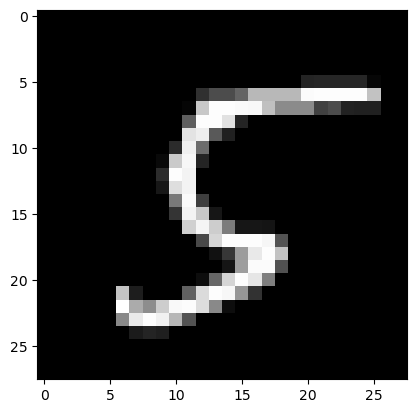

In [29]:
test_predictions(504, W1, B1, W2, B2)